# COVID-19 Data Analysis

By: Brian Rafferty

**Running SQL queries to clean, statistically analyze, and visualize the scope of the pandemic in the United States.**

Data is gathered via free use and open source databases on Google Cloud Platform's SQL BigQuery, including: The New York Times US Coronavirus Database and COVID-19 Open Data.

In [15]:
# Set your own project id here
PROJECT_ID = 'enter_your_project_id_here'
from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

dataset = client.create_dataset('covid_dataset', exists_ok=True)

In [59]:
# Create a reference to the SQL tables
state_table = client.get_table('bigquery-public-data.covid19_nyt.us_states')
county_table = client.get_table('bigquery-public-data.covid19_nyt.us_counties')

# Show the first 5 rows of each table
print(client.list_rows(state_table, max_results=5).to_dataframe())
print('\n')
print(client.list_rows(county_table, max_results=5).to_dataframe())

         date state_name state_fips_code  confirmed_cases  deaths
0  2020-03-15       Guam              66                3       0
1  2020-03-16       Guam              66                3       0
2  2020-03-17       Guam              66                3       0
3  2020-03-18       Guam              66                8       0
4  2020-03-19       Guam              66               12       0


         date       county state_name county_fips_code  confirmed_cases  \
0  2020-03-20  Kansas City   Missouri             None               12   
1  2020-03-21  Kansas City   Missouri             None               13   
2  2020-03-22  Kansas City   Missouri             None               13   
3  2020-03-23  Kansas City   Missouri             None               18   
4  2020-03-24  Kansas City   Missouri             None               30   

   deaths  
0       0  
1       0  
2       0  
3       0  
4       0  


In [60]:
# Data Preprocessing
# Identify the number of cases in each state with an SQL query
query = '''
        SELECT state_name, SUM(confirmed_cases) as total_cases
        FROM `bigquery-public-data.covid19_nyt.us_states`
        GROUP BY state_name
        ORDER BY total_cases DESC
        '''

# Run query
query_job = client.query(query)
query_job.to_dataframe().head(10)

,state_name,total_cases
0,California,94913657
1,New York,87063579
2,Texas,85703893
3,Florida,80261085
4,Illinois,40607617
5,New Jersey,37484385
6,Georgia,35232722
7,Arizona,26873366
8,North Carolina,24428779
9,Pennsylvania,24178491


In [61]:
# Data Preprocessing
# Identify the number of cases in each county with an SQL query
query = '''
        SELECT county, SUM(confirmed_cases) as total_cases
        FROM `bigquery-public-data.covid19_nyt.us_counties`
        GROUP BY county
        ORDER BY total_cases DESC
        '''

# Run query
query_job = client.query(query)
query_job.to_dataframe().head(10)

,county,total_cases
0,New York City,47457405
1,Los Angeles,33677204
2,Cook,22046330
3,Miami-Dade,19806133
4,Maricopa,17440670
5,Harris,15002642
6,Orange,13964455
7,Suffolk,13251244
8,Dallas,10436993
9,Jefferson,10156914


In [62]:
# Data Preprocessing
# Sort the total cases in the states increased over time with an SQL query
query = '''
        SELECT date, SUM(confirmed_cases) as total_cases
        FROM `bigquery-public-data.covid19_nyt.us_states`
        GROUP BY date
        ORDER BY date
        '''

# Run query
query_job = client.query(query)
sorted_df = query_job.to_dataframe()
sorted_df.head(10)

,date,total_cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
5,2020-01-26,5
6,2020-01-27,5
7,2020-01-28,5
8,2020-01-29,5
9,2020-01-30,6


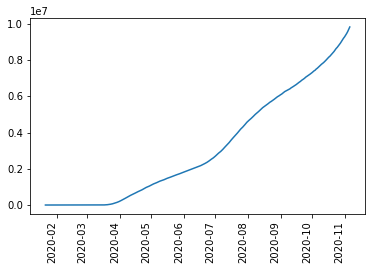

In [63]:
# Data Visualization
# View the data in a line graph measuring cases vs. time
plt.plot(sorted_df['date'], sorted_df['total_cases'])
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

In [64]:
# Data Preprocessing
# Lets sort the county SQL table to see how the most infected county changed over time
query = '''
        SELECT date, SUM(confirmed_cases) as total_cases
        FROM `bigquery-public-data.covid19_nyt.us_counties`
        WHERE county = 'New York City'
        GROUP BY date
        ORDER BY date 
        '''

# Run query
query_job = client.query(query)
sorted_df = query_job.to_dataframe()
sorted_df.head(10)

,date,total_cases
0,2020-03-01,1
1,2020-03-02,1
2,2020-03-03,2
3,2020-03-04,2
4,2020-03-05,4
5,2020-03-06,5
6,2020-03-07,12
7,2020-03-08,14
8,2020-03-09,20
9,2020-03-10,37


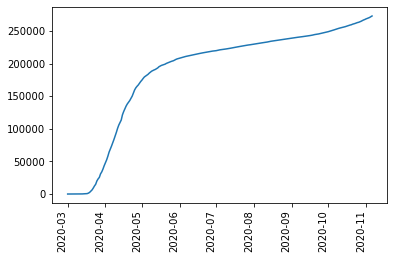

In [65]:
# Data Visualization
# View the data in a line graph measuring cases vs. time
plt.plot(sorted_df['date'], sorted_df['total_cases'])
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

In [66]:
# Use new SQL database, which includes daily information instead of running totals
# Create a reference to the SQL table
covid_table = client.get_table('bigquery-public-data.covid19_open_data.covid19_open_data')

# Show the first 5 rows of each table
client.list_rows(covid_table, max_results=5).to_dataframe()

,date,location_key,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
0,2020-02-05,US_VA_51025,US,United States of America,VA,Virginia,51025,Brunswick County,US,USA,...,geoId/51025,2534167,36.76,-77.86,POINT(-77.86 36.76),14.522222,6.994444,19.588889,1.862667,None
1,2020-02-06,US_VA_51025,US,United States of America,VA,Virginia,51025,Brunswick County,US,USA,...,geoId/51025,2534167,36.76,-77.86,POINT(-77.86 36.76),8.740741,6.172840,18.802469,11.525250,None
2,2020-02-07,US_VA_51025,US,United States of America,VA,Virginia,51025,Brunswick County,US,USA,...,geoId/51025,2534167,36.76,-77.86,POINT(-77.86 36.76),12.777778,5.805556,15.577778,34.459333,None
3,2020-02-08,US_VA_51025,US,United States of America,VA,Virginia,51025,Brunswick County,US,USA,...,geoId/51025,2534167,36.76,-77.86,POINT(-77.86 36.76),2.966667,-2.216667,7.655556,2.201333,None
4,2020-02-09,US_VA_51025,US,United States of America,VA,Virginia,51025,Brunswick County,US,USA,...,geoId/51025,2534167,36.76,-77.86,POINT(-77.86 36.76),3.972222,-2.988889,10.983333,0.158750,None


In [67]:
# Data Preprocessing
# Sort new data to see how infection rates changed over time
query = '''
        SELECT date, SUM(new_confirmed) as confirmed
        FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
        WHERE country_code = 'US'
        GROUP BY date
        HAVING confirmed > 0
        ORDER BY date
        ''' 

# Run query
query_job = client.query(query)
sorted_df = query_job.to_dataframe()
sorted_df.head(10)

,date,confirmed
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,4
3,2020-01-30,3
4,2020-01-31,2
5,2020-02-01,1
6,2020-02-02,7
7,2020-02-05,1
8,2020-02-10,2
9,2020-02-12,1


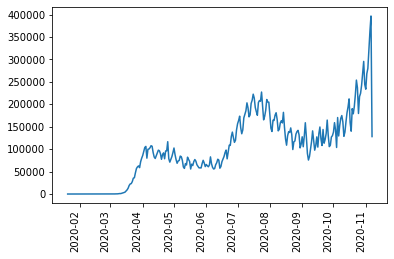

In [68]:
# Data Visualization
# Plot new confirmed daily cases vs time 
plt.plot(sorted_df['date'], sorted_df['confirmed'])
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

In [5]:
# Data Preprocessing
# Group data by month to extract statistics
query = '''
        SELECT EXTRACT(MONTH FROM date) AS month, SUM(new_confirmed) as confirmed
        FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
        WHERE country_code = 'US'
        GROUP BY month
        ORDER BY month
        ''' 

# Run query
query_job = client.query(query)
sorted_df = query_job.to_dataframe()
sorted_df.head(10)

,month,confirmed
0,1,11
1,2,146
2,3,647592
3,4,2750879
4,5,2192453
5,6,2566699
6,7,5785108
7,8,4420447
8,9,3608233
9,10,5764345


In [6]:
# Statistical Analysis
# Look at underlying stats within the monthly cases
sorted_df.describe()

,month,confirmed
count,11.000000,1.100000e+01
mean,6.000000,2.702383e+06
std,3.316625,2.055870e+06
min,1.000000,1.100000e+01
25%,3.500000,1.318948e+06
50%,6.000000,2.566699e+06
75%,8.500000,4.014340e+06
max,11.000000,5.785108e+06


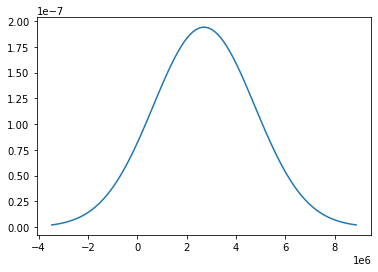

In [12]:
# Data Visualization
# Plot distribution of monthly covid cases, determine how gaussian it is
mu = 2.702383 * 10**6
sigma = 2.055870 * 10**6
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [34]:
# Data Preprocessing
# Lets query the SQL database to see how the average cases changed each month
monthly_avg_df = pd.DataFrame(columns=['month','avg_confirmed'])
days_in_month = {
    1 : 10,
    2 : 29,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10: 31,
    11: 8
}
for i in range(1,12):
    query = '''
            SELECT EXTRACT(MONTH FROM date) AS month, SUM(new_confirmed) AS avg_confirmed
            FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
            WHERE country_code = 'US'
            GROUP BY month
            HAVING month = {}
            '''.format(i)

    # Run query
    query_job = client.query(query)
    avg_df = query_job.to_dataframe()
    avg_df['avg_confirmed'] /= days_in_month[i]
    
    
    monthly_avg_df = monthly_avg_df.append(avg_df, ignore_index=True)

monthly_avg_df.head(11)

,month,avg_confirmed
0,1,1.100000
1,2,5.034483
2,3,20887.032258
3,4,91695.566667
4,5,70724.774194
5,6,85556.600000
6,7,186618.290323
7,8,142597.548387
8,9,120276.733333
9,10,185947.870968


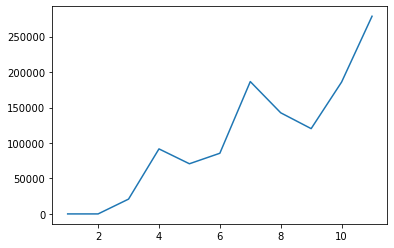

In [35]:
# Data Visualization
# Lets plot the monthly average dataframe with a line graph
plt.plot(monthly_avg_df['month'], monthly_avg_df['avg_confirmed'])
plt.show()

In [ ]:
# The data demonstrates how infectious the disease is, and how it is going unchecked in the US